<a href="https://colab.research.google.com/github/tarhi/Apple-statistique-et-analyse/blob/main/Apple_statistics_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Action Apple :
Dans ce cas, Nous étudierons une distribution normale de l’action Apple entre 2005 et 2017 a travers une analyse statistique pour prédire, prendre une décision et modéliser le rendement boursier c’est la 1er stratégie de trading simple pour savoir à quel moment nous achèterons des actions et quand nous voulons les vendre a fin de générer le maximum de profil et éviter le risque d’investir de l’argent dans les actions Apple.
Dans l’analyse financière, il est important d’identifier les variables importantes pour nous aider a faire de meilleurs prévisions et a prendre des meilleurs décisions
Tout d’abord nous importons les bibliothèques nécessaires afin de faire découvrir, nettoyer, analyser et visualiser les différents variables.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
apple = pd.read_csv('/content/apple.csv', index_col=0)
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


In [ ]:
# decouvrir notre Data
apple.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2832.0,6.832087e+01,4.357551e+01,1.048857e+01,2.648393e+01,6.312000e+01,1.015525e+02,1.751100e+02
High,2832.0,6.893332e+01,4.384819e+01,1.056857e+01,2.669857e+01,6.401572e+01,1.023725e+02,1.772000e+02
Low,2832.0,6.764957e+01,4.329548e+01,1.037143e+01,2.601821e+01,6.249357e+01,1.006325e+02,1.748600e+02
Close,2832.0,6.831134e+01,4.358543e+01,1.046143e+01,2.643571e+01,6.321286e+01,1.015925e+02,1.764200e+02
Adj Close,2832.0,5.888925e+01,4.516289e+01,7.081933e+00,1.789583e+01,4.781032e+01,9.687805e+01,1.757036e+02
Volume,2832.0,1.247076e+08,9.902702e+07,1.147590e+07,5.039560e+07,9.986585e+07,1.672990e+08,8.432424e+08
MA10,2823.0,6.823821e+01,4.336982e+01,1.064600e+01,2.635000e+01,6.318543e+01,1.010280e+02,1.738160e+02
MA50,2783.0,6.790164e+01,4.238727e+01,1.176171e+01,2.570693e+01,6.261011e+01,1.016874e+02,1.699298e+02
shares,2832.0,6.451271e-01,4.785593e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Close1,2831.0,6.833169e+01,4.357967e+01,1.046143e+01,2.643929e+01,6.323714e+01,1.016050e+02,1.764200e+02


In [ ]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
apple.shape

(2832, 6)

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2832 entries, 2006-10-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2832 non-null   float64
 1   High       2832 non-null   float64
 2   Low        2832 non-null   float64
 3   Close      2832 non-null   float64
 4   Adj Close  2832 non-null   float64
 5   Volume     2832 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 154.9+ KB


In [ ]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400
2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500
2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200
2017-12-28,171.000000,171.850006,170.479996,171.080002,170.385315,16480200
2017-12-29,170.520004,170.589996,169.220001,169.229996,168.542831,25999900


<AxesSubplot:xlabel='Date'>

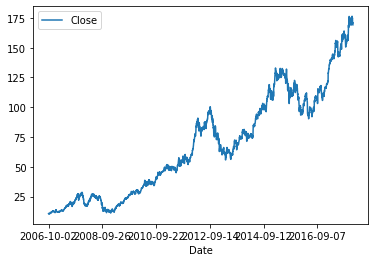

In [ ]:
# analyse apple 'Close' per years
apple.loc['2005-12-01':'2018-12-31' ,'Close'].plot(legend=True)
# apple.loc['2016-12-01':'2016-12-31' ,'Close'].plot()
# apple.loc['2017-12-01':'2017-12-31' ,'Close'].plot()
# apple.loc['2018-12-01':'2018-12-31' ,'Close'].plot()

In [ ]:
apple['MA10'] = apple['Close'].rolling(10).mean() #fasy signal
apple['MA50'] = apple['Close'].rolling(50).mean() #lent signal

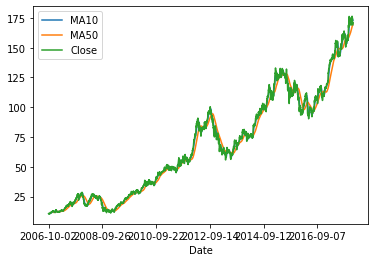

In [ ]:
apple['MA10'].plot(legend=True)
apple['MA50'].plot(legend=True)
apple['Close'].plot(legend=True)
plt.show()

In [ ]:
# if MA10 largest to MA50 we buy and hold action

In [ ]:
# apple.head(2)
apple['shares'] =  [1 if apple.loc[ i ,'MA10'] > apple.loc[ i ,'MA50'] else 0
                  for i in apple.index]

# profil when Shares equal 0 and 1 buy and hold action

In [ ]:
# add new columns named 'daily_profit'
# first we craet nw columns named close1 is a close price of tomorrow 
apple['Close1'] = apple['Close'].shift(-1)

In [ ]:
apple['daily_profit']  = apple['Close1'] - apple['Close']
apple.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,shares,Close1,daily_profit
Date,,,,,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,NaN,NaN,0,10.582857,-0.111428
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,NaN,NaN,0,10.768572,0.185715
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,NaN,NaN,0,10.690000,-0.078572
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,NaN,NaN,0,10.602858,-0.087142
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,NaN,NaN,0,10.661428,0.058570


In [ ]:
apple['profit'] = [apple.loc[i , 'Close1'] - apple.loc[i , 'Close']
                   if apple.loc[i ,'shares'] == 0 else 0
                   for i in apple.index]

<AxesSubplot:xlabel='Date'>

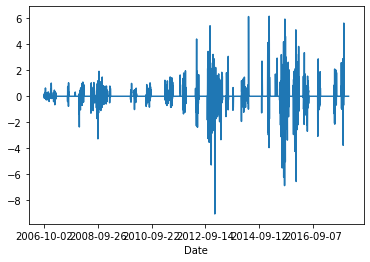

In [ ]:
apple['profit'].plot()

In [ ]:
apple["win"] = apple['profit'].cumsum()
apple.tail()
# we cheek the last column of 'win'

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,shares,Close1,daily_profit,profit,win
Date,,,,,,,,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400,173.815999,169.0422,1,170.570007,-4.439988,0.0,34.692862
2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500,173.606000,169.3138,1,170.600006,0.029999,0.0,34.692862
2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200,173.496001,169.5282,1,171.080002,0.479996,0.0,34.692862
2017-12-28,171.000000,171.850006,170.479996,171.080002,170.385315,16480200,173.377000,169.7404,1,169.229996,-1.850006,0.0,34.692862
2017-12-29,170.520004,170.589996,169.220001,169.229996,168.542831,25999900,173.078000,169.9298,1,NaN,NaN,0.0,34.692862


In [ ]:
print("total monnie you win is : ", apple.loc[apple.index[-1], "win"])
print("total monnie you spent is : ", apple.loc[apple.index[0], "Close"])

total monnie you win is :  34.69286199999993
total monnie you spent is :  10.694285


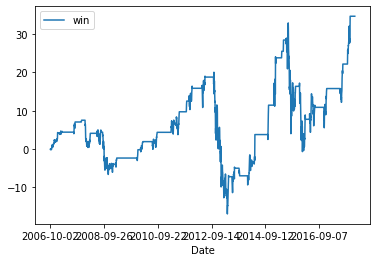

In [ ]:
apple['win'].plot(legend=True)
plt.show()

<AxesSubplot:xlabel='Date'>

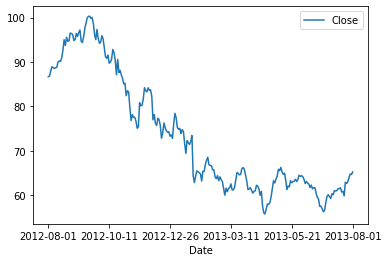

In [ ]:
apple.loc['2012-08-01':'2013-08-01' ,'Close'].plot(legend=True)

# big drop in apple's stock price 

In [ ]:
# probabilité et analyse

from scipy.stats import norm

In [ ]:
# Calcul the mean and std
mu = apple['daily_profit'].mean()
sigma = apple['daily_profit'].std(ddof=1)
print(mu, sigma)


0.05599989791593076 1.2019967098445599


<AxesSubplot:>

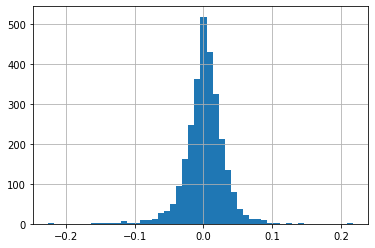

In [ ]:
#  calcule the day return
apple['log_return'] = np.log(apple['Close']).shift(-1) - np.log(apple['Close']).shift()
apple['log_return'].hist(bins = 50)

In [ ]:
# the histogram is similar to a cloche courbe so the distribution is normal

In [ ]:
# calcule de probabilté que 40% des actions ont chuté dans l'année 2012 soit 220 jour de trade

# nous devons d'abord calcule la moyenne et ecart type de cette distribultion normale 

mu_220 = mu*220
sigma_220 = 220**0.5 * sigma
norm_cdf = norm.cdf(-0.4, mu_220, sigma_220)

print("la probabilité de chute des actions apple 40% durant une année 2012-2013 est de: ", norm_cdf)

la probabilité de chute des actions apple 40% durant une année 2012-2013 est de:  0.2377795134288253


In [ ]:
# alors ce qui a arrive a action apple entre 2012-2013, il n'est pas compatible avec le rendement global 